Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters found by GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification report for the optimized KNN model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.94      1.00      0.97        50
           2       1.00      1.00      1.00        47
           3       0.96      0.96      0.96        54
           4       0.98      0.98      0.98        60
           5       0.98      0.97      0.98        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.95      0.92      0.93        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

True Label vs Predicted L

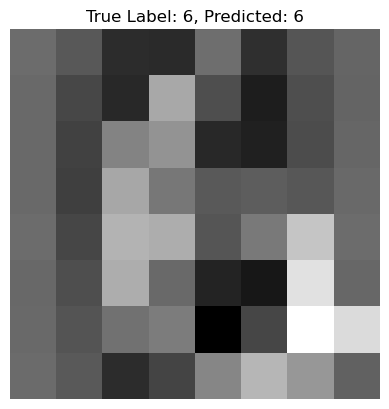

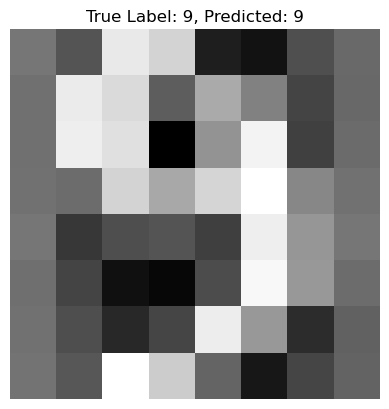

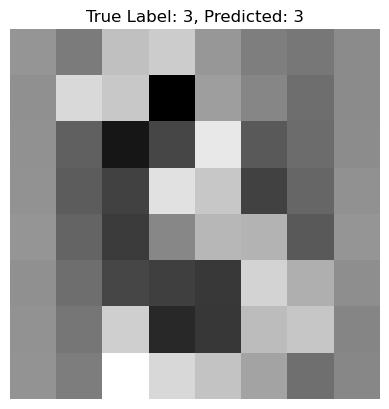

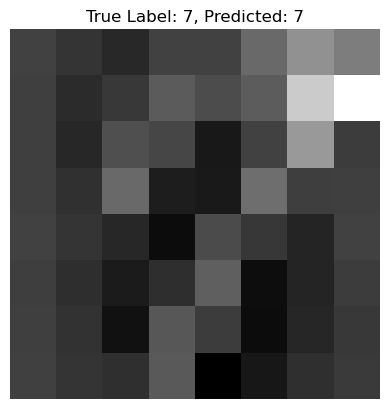

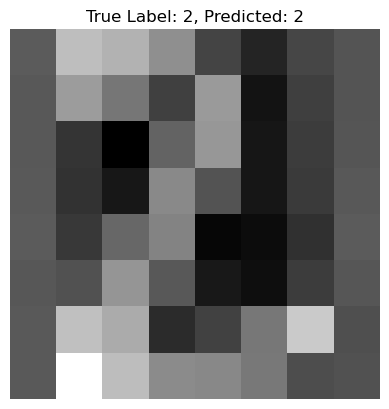

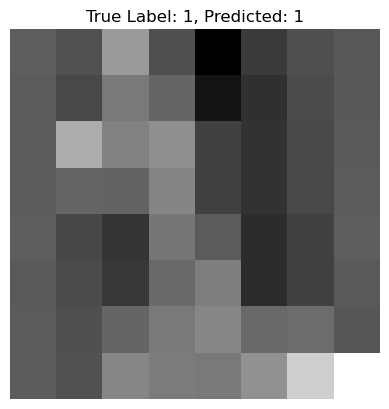

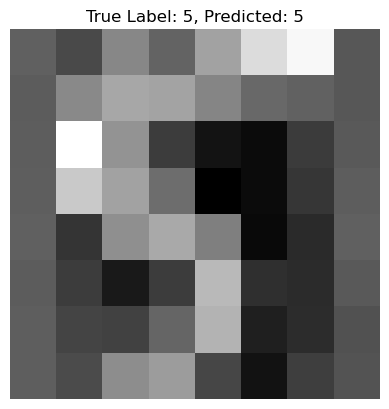

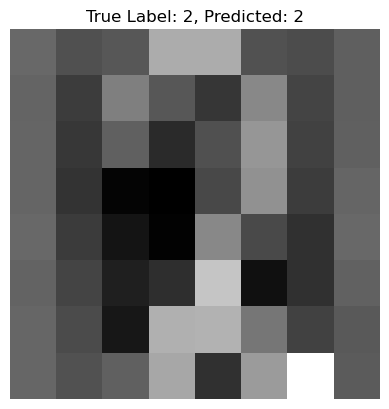

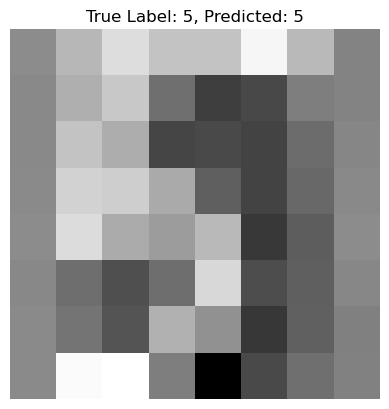

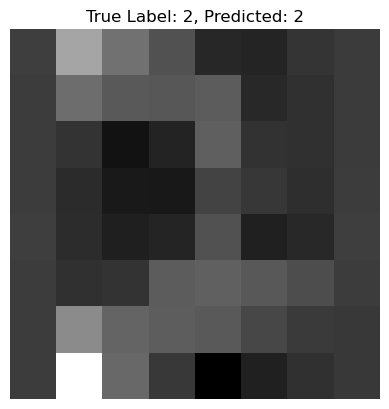

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the digits dataset
digits = datasets.load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up the parameter grid for GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9],       # Number of neighbors to test
    'weights': ['uniform', 'distance'], # Weighting methods
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Initialize the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Set up the GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (the model with the best parameters)
best_knn_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predict using the best model
y_pred_best = best_knn_model.predict(X_test)

# Evaluate the best model
print("Classification report for the optimized KNN model:")
print(classification_report(y_test, y_pred_best))

# Visualize some of the test images with their true and predicted labels
print("True Label vs Predicted Label for the first 10 examples:")
for i in range(10):  # Adjust the range to see more or fewer images
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True Label: {y_test[i]}, Predicted: {y_pred_best[i]}")
    plt.axis('off')
    plt.show()


Distance-Based Weighting (weights='distance'):

In this case, neighbors closer to the target point have a stronger influence on the prediction than those farther away. The closer the neighbor, the higher its weight.
This can be useful when closer points are likely more similar or relevant to the target point.
For example, if a target point has a close neighbor from Class A and a distant neighbor from Class B, distance weighting would give more influence to the closer neighbor from Class A, likely classifying the target as Class A.
Example to Illustrate the Difference
Let’s say we want to classify a new data point (Target) using 5 nearest neighbors, and we have the following setup:

| Neighbor | Distance to Target | Class | Weight (Uniform) | Weight (Distance-Based) |
|----------|---------------------|-------|------------------|-------------------------|
| 1        | 0.5                 | A     | 1                | 2                       |
| 2        | 0.7                 | B     | 1                | 1.43                    |
| 3        | 1.0                 | A     | 1                | 1                       |
| 4        | 1.5                 | B     | 1                | 0.67                    |
| 5        | 2.0                 | A     | 1                | 0.5                     |


Weight = 1 / Distance to Target
Neighbor 1: Distance to Target = 0.5
Weight = 1 / 0.5 = 2

Neighbor 2: Distance to Target = 0.7
Weight = 1 / 0.7 ≈ 1.43